In [114]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2

from ChessReD_Dataset import ChessReDDataset

In [115]:
dataset = ChessReDDataset(label_key='corners')
dataloader = dataset.getLoader()
len(dataset)

2078

In [ ]:
# replace with method being tested
def extractCorners(img: torch.Tensor) -> torch.Tensor: # [4,2]
    return torch.rand(4,2, dtype=torch.float32) * 3024

In [117]:
def get_mask(corners: torch.Tensor, size: tuple[int, int]) -> torch.Tensor:
    mask = np.zeros(size)
    mask = cv2.fillPoly(mask, [corners.numpy().astype(np.int32)], 1)
    return torch.tensor(mask, dtype=torch.float32)

In [118]:
def get_acc(corners_prime: torch.Tensor, corners: torch.Tensor, img_shape: tuple[int, int]) -> float:
    # IOU
    mask_prime = get_mask(corners_prime, img_shape)
    mask = get_mask(corners, img_shape)
    intersection = torch.sum(mask * mask_prime)
    union = torch.sum((mask + mask_prime) > 0)
    return (intersection / union).item()

0.9879509806632996

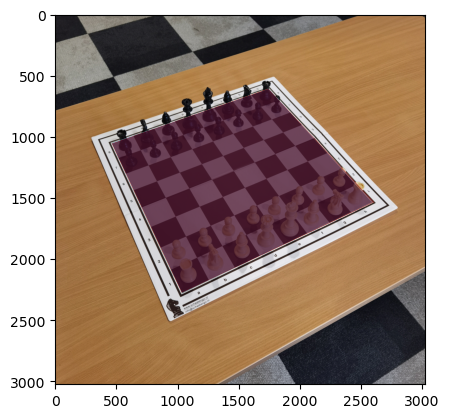

In [121]:
img, _ = dataset[0]

y_prime = [[ 76.59788,  175.24043 ],
            [171.17491,  376.66028 ],
            [431.50546,  254.27939 ],
            [288.10693,  100.996765]]
y_prime = torch.tensor(y_prime) / 500 * 3024

y = torch.tensor([
        [464, 1055],
        [1747, 613],
        [2586, 1537],
        [1039, 2279],
    ], dtype=torch.float32)

# --------------------------------------

mask = get_mask(y, img.shape[:2])
mask_prime = get_mask(y_prime, img.shape[:2])
plt.imshow(img, cmap='gray');
plt.imshow(mask, alpha=mask*.5, cmap='Blues');
plt.imshow(mask_prime, alpha=mask_prime*.5, cmap='Reds');

acc = get_acc(y_prime, y, img.shape)
acc